In [41]:
!pip install opendatasets

In [42]:
import opendatasets as od
{"username":"karamarora","key":"fcb19a761620da28c2f4d6036416e24b"}
od.download("https://www.kaggle.com/datasets/tourist55/alzheimers-dataset-4-class-of-images")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: karamarora
Your Kaggle Key: ··········


100%|██████████| 34.1M/34.1M [00:02<00:00, 14.7MB/s]


In [43]:
os.chdir('./alzheimers-dataset-4-class-of-images')

In [44]:
import pandas as pd
import os
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

# from Models.dataset import load_train_data, load_test_data


In [45]:
def load_train_data(img_size):
    """
    This function loads a dataset of images from a specified path, resizes the images,
    and stores them in a pandas DataFrame along with their respective classes.

    The images are categorized into four classes: 'MildDemented', 'ModerateDemented',
    'NonDemented', and 'VeryMildDemented'. The function iterates through each class,
    opens and resizes the images, and appends them to a dictionary along with their class.

    The dictionary is then converted into a pandas DataFrame and returned.

    Returns:
        df_train (pd.DataFrame): A DataFrame containing the resized images and their classes.
    """

    df_train=[] # create a dictionary to store the dataset
    labels=[] # create a list to store the labels

    """# create dataset from the image folder"""

    classes=['MildDemented','ModerateDemented','NonDemented','VeryMildDemented']
    train_path=''

    for i in classes:
        if i=='MildDemented':
            train_path='Alzheimer_s Dataset/train/MildDemented/mildDem'
        elif i=='ModerateDemented':
            train_path='Alzheimer_s Dataset/train/ModerateDemented/moderateDem'
        elif i=='NonDemented':
            train_path='Alzheimer_s Dataset/train/NonDemented/nonDem'
        else:
            train_path='Alzheimer_s Dataset/train/VeryMildDemented/verymildDem'
        for j in range(100000):
            try:
                img=cv2.imread(f'{train_path}{j}.jpg',cv2.IMREAD_GRAYSCALE)
                df_train.append(cv2.resize(img,(img_size,img_size)).reshape(img_size*img_size))
                labels.append(i)

            except:
                break

    """# save Dataset into a pandas Dataframe"""
    return np.array(df_train),labels

In [46]:
def load_test_data(img_size):
    """
    This function loads a dataset of images from a specified path, resizes the images,
    and stores them in a pandas DataFrame along with their respective classes.

    The images are categorized into four classes: 'MildDemented', 'ModerateDemented',
    'NonDemented', and 'VeryMildDemented'. The function iterates through each class,
    opens and resizes the images, and appends them to a dictionary along with their class.

    The dictionary is then converted into a pandas DataFrame and returned.

    Returns:
        df_train (pd.DataFrame): A DataFrame containing the resized images and their classes.
    """

    df_test=[] # create a dictionary to store the dataset
    labels=[] # create a list to store the labels

    """# create dataset from the image folder"""

    classes=['MildDemented','ModerateDemented','NonDemented','VeryMildDemented']
    test_path=''

    for i in classes:
        if i=='MildDemented':
            test_path='Alzheimer_s Dataset/test/MildDemented'
        elif i=='ModerateDemented':
            test_path='Alzheimer_s Dataset/test/ModerateDemented'
        elif i=='NonDemented':
            test_path='Alzheimer_s Dataset/test/NonDemented'
        else:
            test_path='Alzheimer_s Dataset/test/VeryMildDemented'
        for filename in os.listdir(test_path):
            if filename.endswith(".jpg"):
                try:
                    img=cv2.imread(os.path.join(test_path, filename),cv2.IMREAD_GRAYSCALE)
                    df_test.append(cv2.resize(img,(img_size,img_size)).reshape(img_size*img_size))
                    labels.append(i)

                except:
                    break

    """# save Dataset into a pandas Dataframe"""
    return np.array(df_test),labels

In [81]:
img_size=224
df_train,labels=load_train_data(img_size)
df_test,labels_test=load_test_data(img_size)

In [82]:
print(df_train.shape)
print(df_test.shape)
# df_train.head()
df_train=pd.DataFrame(df_train)
df_train['class']=labels
df_test=pd.DataFrame(df_test)
df_test['class']=labels_test

(5121, 50176)
(1279, 50176)


In [83]:
df=pd.concat([df_train,df_test])

In [88]:
# df_train.head()
df.shape
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [95]:
# Divide X_test into validation and test
from sklearn.model_selection import train_test_split
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)
# Split the temporary set into the final training set and a validation set
X_test, X_validation, Y_test, Y_validation = train_test_split(X_temp, Y_temp, test_size=0.2, random_state=42, shuffle=True)
X_train=X_train.values.reshape(X_train.shape[0],img_size,img_size,1)
X_test=X_test.values.reshape(X_test.shape[0],img_size,img_size,1)
X_validation=X_validation.values.reshape(X_validation.shape[0],img_size,img_size,1)

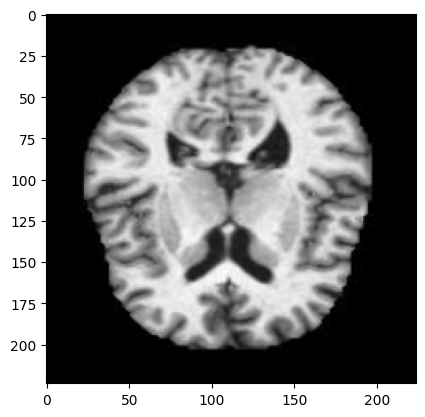

In [96]:
plt.imshow(X_train[0],cmap='gray')

In [100]:
Y_train[5000]

'VeryMildDemented'

ValueError: ignored

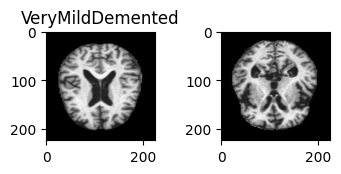

In [105]:
import random
for i in range(0,9):
    j=random.randint(0,Y_train.shape[0])
    plt.subplot(330+1+i)
    plt.imshow(X_train[j].reshape(img_size,img_size),cmap=plt.get_cmap('gray'))
    plt.title(Y_train[j])

In [106]:
# encode the target variable
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y_train_encoded=le.fit_transform(Y_train)
Y_test_encoded=le.transform(Y_test)
Y_validation_encoded=le.transform(Y_validation)


In [108]:
print(Y_validation.shape)
print(Y_test.shape)
print(Y_train.shape)

(256,)
(1024,)
(5120,)


# Training without 5-Fold CV

In [111]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.utils import to_categorical
from keras import regularizers

y_train=to_categorical(Y_train_encoded)
y_test=to_categorical(Y_test_encoded)
y_val=to_categorical(Y_validation_encoded)

model=Sequential()

model.add(Conv2D(32,(5,5),activation='relu',input_shape=(img_size,img_size,1),padding='same')) #f=3,p=1,s=1,c=32
model.add(MaxPooling2D(2,2)) #f=2,s=2

model.add(Conv2D(32,(5,5),activation='relu',padding='same')) #f=3,p=1,s=1,c=32
# add batch normalisation
model.add(BatchNormalization())
# Add pooling layer
model.add(MaxPooling2D(2,2)) #f=2,s=2
model.add(Conv2D(64,(3,3),activation='relu',padding='same')) #f=3,p=1,s=1,c=64
model.add(MaxPooling2D(2,2)) #f=2,s=2

model.add(Conv2D(64,(3,3),activation='relu',padding='same')) #f=3,p=1,s=1,c=64
model.add(MaxPooling2D(2,2)) #f=2,s=2

model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),activation='relu',padding='same')) #f=3,p=1,s=1,c=128
#Add pooling layer
model.add(MaxPooling2D(2,2)) #f=2,s=2
model.add(Conv2D(256,(3,3),activation='relu',padding='same')) #f=3,p=1,s=1,c=128
#Add pooling layer
# model.add(MaxPooling2D(2,2)) #f=2,s=2
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu', kernel_regularizer=regularizers.l1(0.01)))
model.add(Dropout(0.2))
model.add(Dense(4,activation='softmax'))

model.compile(optimizer=Adam(lr=1e-03),loss=categorical_crossentropy,metrics=['accuracy'])

# history=model.fit(X_denoise_train,y_train,epochs=15,batch_size=128,validation_data=(X_denoise_val,y_val))


In [112]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 224, 224, 32)      832       
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 112, 112, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_43 (Conv2D)          (None, 112, 112, 32)      25632     
                                                                 
 batch_normalization_14 (Ba  (None, 112, 112, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 56, 56, 32)        0         
 ng2D)                                                           
                                                      

In [114]:
history=model.fit(X_train,y_train,epochs=15,batch_size=75,validation_data=(X_validation,y_val))

Epoch 1/15
69/69 [==============================] - 14s 191ms/step - loss: 0.6284 - accuracy: 0.8029 - val_loss: 0.7372 - val_accuracy: 0.7461
Epoch 2/15
69/69 [==============================] - 16s 232ms/step - loss: 0.5474 - accuracy: 0.8420 - val_loss: 0.9788 - val_accuracy: 0.6758
Epoch 3/15
69/69 [==============================] - 14s 209ms/step - loss: 0.4885 - accuracy: 0.8672 - val_loss: 0.8356 - val_accuracy: 0.7305
Epoch 4/15
69/69 [==============================] - 17s 254ms/step - loss: 0.4418 - accuracy: 0.8857 - val_loss: 0.7714 - val_accuracy: 0.7500
Epoch 5/15
69/69 [==============================] - 17s 250ms/step - loss: 0.3861 - accuracy: 0.9066 - val_loss: 0.5151 - val_accuracy: 0.8711
Epoch 6/15
69/69 [==============================] - 16s 227ms/step - loss: 0.3365 - accuracy: 0.9271 - val_loss: 0.8407 - val_accuracy: 0.7656
Epoch 7/15
69/69 [==============================] - 14s 201ms/step - loss: 0.2758 - accuracy: 0.9457 - val_loss: 0.6433 - val_accuracy: 0.8203

In [116]:
model.evaluate(X_test,y_test)

32/32 [==============================] - 4s 96ms/step - loss: 0.2528 - accuracy: 0.9434


[0.25277888774871826, 0.943359375]

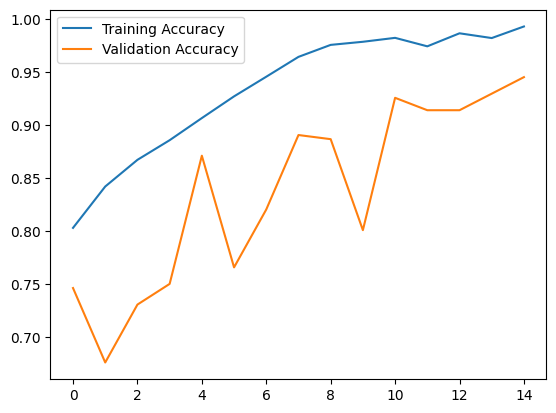

In [118]:
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.legend()

In [122]:
label_encoded_predictions = np.argmax(model.predict(X_test), axis=1)
y_pred=le.inverse_transform(label_encoded_predictions)
y_pred

32/32 [==============================] - 3s 94ms/step


array(['VeryMildDemented', 'NonDemented', 'MildDemented', ...,
       'MildDemented', 'NonDemented', 'NonDemented'], dtype=object)

In [125]:
from sklearn.metrics import confusion_matrix, f1_score, recall_score, accuracy_score


# Compute confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Compute F1 score
f1 = f1_score(Y_test, y_pred, average='weighted')
print("F1 Score: ", f1)

# Compute recall
recall = recall_score(Y_test, y_pred, average='weighted')
print("Recall: ", recall)

# Compute accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy: ", accuracy)


Confusion Matrix:
[[155   0   0  10]
 [  0   8   0   0]
 [  3   0 468  41]
 [  1   0   3 335]]
F1 Score:  0.944016568578145
Recall:  0.943359375
Accuracy:  0.943359375


In [127]:
model.save('model_sequential.h5')

# Training parallel CNN

In [ ]:
# import concatentate layer
from keras.layers import Concatenate
from keras.models import Model
from keras import Input
from keras.optimizers import Adam,SGD
from keras.optimizers.schedules import ExponentialDecay
from keras import regularizers
def create_parallel_model(X_train_shape):

    lr_schedule = ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)



    input_shape=Input(shape=X_train_shape)
    conv1 = Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(input_shape) #f=3,,s=2,c=32
    conv2 = Conv2D(32, kernel_size=(5, 5), activation='relu', padding='same')(input_shape) #f=7,,s=2,c=32
    out= Concatenate()([conv1, conv2])  # concatenate the feature maps
    pool_1=MaxPooling2D(2,2)(out) #f=2,s=2
    batch_norm=BatchNormalization()(pool_1)

    conv3=Conv2D(16, kernel_size=(3, 3),strides=(2,2), activation='relu', padding='same')(batch_norm) #f=3,s=2,c=16
    conv4=Conv2D(48, kernel_size=(5, 5),strides=(2,2), activation='relu', padding='same')(batch_norm) #f=5,s=2,c=48
    out=Concatenate()([conv3, conv4]) # concatenate the feature maps
    conv5= Conv2D(96, kernel_size=(3, 3),strides=(2,2), activation='relu', padding='same')(out) #f=3,p=same,s=2,c=64
    pool_2=MaxPooling2D(2,2)(conv5) #f=2,s=2

    conv6= Conv2D(128, kernel_size=(3, 3),strides=(2,2), activation='relu', padding='same')(pool_2) #f=5,s=2,c=64
    batch_norm_2=BatchNormalization()(conv6)
    pool_3=MaxPooling2D(2,2)(batch_norm_2) #f=2,s=2
    flatten=Flatten()(pool_3)
    dropout_1=Dropout(0.2)(flatten)
    fc1=Dense(128,activation='relu', kernel_regularizer=regularizers.l1(0.01))(dropout_1)
    # dropout_2=Dropout(0.2)(fc1)
    fc2=Dense(64,activation='relu',kernel_regularizer=regularizers.l1(0.01))(fc1)
    dropout_3=Dropout(0.2)(fc2)
    fc_out=Dense(4,activation='softmax')(dropout_3)
    model=Model(inputs=input_shape,outputs=fc_out)
    # model.compile(optimizer=Adam(lr=1e-04),loss=categorical_crossentropy,metrics=['accuracy'])
    model.compile(optimizer=SGD(learning_rate=lr_schedule),loss=categorical_crossentropy,metrics=['accuracy'])

    return model




In [ ]:
X_train=X_train.reshape(X_train.shape[0],img_size,img_size,1)
X_test=X_test.reshape(X_test.shape[0],img_size,img_size,1)
X_validation=X_validation.reshape(X_validation.shape[0],img_size,img_size,1)
model_parallel=create_parallel_model(X_train.shape[1:])
y_train=to_categorical(Y_train_encoded)
y_test=to_categorical(Y_test_encoded)
y_val=to_categorical(Y_validation_encoded)
model_parallel.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 1)]        0         []                            
                                                                                                  
 conv2d_18 (Conv2D)          (None, 224, 224, 32)         320       ['input_3[0][0]']             
                                                                                                  
 conv2d_19 (Conv2D)          (None, 224, 224, 32)         832       ['input_3[0][0]']             
                                                                                                  
 concatenate_4 (Concatenate  (None, 224, 224, 64)         0         ['conv2d_18[0][0]',           
 )                                                                   'conv2d_19[0][0]']     

In [ ]:
#train the model
history_parallel=model_parallel.fit(X_train,y_train,epochs=10,batch_size=50,validation_data=(X_validation,y_val))

Epoch 1/10
103/103 [==============================] - 32s 277ms/step - loss: 22.2552 - accuracy: 0.5003 - val_loss: 5.1308 - val_accuracy: 0.5156
Epoch 2/10
103/103 [==============================] - 34s 333ms/step - loss: 2.6055 - accuracy: 0.5556 - val_loss: 1.8690 - val_accuracy: 0.5508
Epoch 3/10
103/103 [==============================] - 34s 335ms/step - loss: 1.4399 - accuracy: 0.5917 - val_loss: 1.6322 - val_accuracy: 0.3750
Epoch 4/10
103/103 [==============================] - 30s 291ms/step - loss: 1.1732 - accuracy: 0.6239 - val_loss: 1.5290 - val_accuracy: 0.3516
Epoch 5/10
103/103 [==============================] - 32s 314ms/step - loss: 1.0385 - accuracy: 0.6678 - val_loss: 1.1755 - val_accuracy: 0.5859
Epoch 6/10
103/103 [==============================] - 31s 305ms/step - loss: 0.9606 - accuracy: 0.6956 - val_loss: 1.4135 - val_accuracy: 0.4727
Epoch 7/10
 21/103 [=====>........................] - ETA: 29s - loss: 0.8572 - accuracy: 0.7581

KeyboardInterrupt: ignored

In [ ]:
# model with 62.5% accuracy on 100x100 and lr=1e-04
val_acc = history_parallel.history['val_accuracy']
acc=history_parallel.history['accuracy']
loss=history_parallel.history['loss']
print('loss: ', loss)
print('Accuracy: ', acc)
print('Validation accuracy: ', val_acc)

loss:  [13.165122985839844, 11.7567777633667, 10.426074028015137, 9.179301261901855, 8.0139799118042, 6.9484734535217285, 5.988248348236084, 5.145057201385498, 4.389386177062988, 3.7241475582122803]
Accuracy:  [0.491115003824234, 0.5817223191261292, 0.652216374874115, 0.7236867547035217, 0.7947666645050049, 0.853348970413208, 0.9064635634422302, 0.9339972734451294, 0.9531341791152954, 0.963288426399231]
Validation accuracy:  [0.5546875, 0.609375, 0.5859375, 0.58203125, 0.59375, 0.63671875, 0.6015625, 0.63671875, 0.62890625, 0.609375]


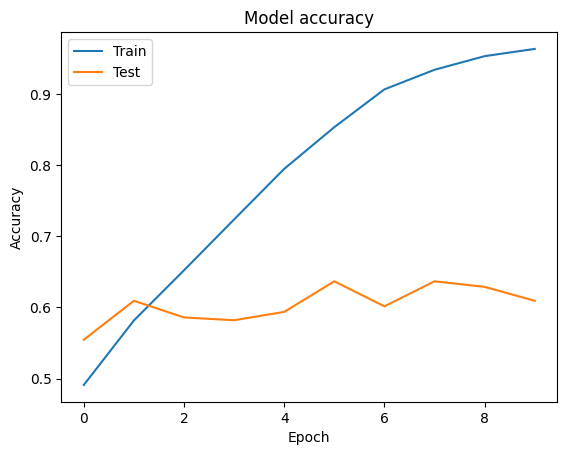

In [ ]:
import matplotlib.pyplot as plt

plt.plot(acc)
plt.plot(val_acc)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:
model_parallel.save('model_parallel.h5')

In [ ]:
from keras.models import load_model
model=load_model('model_parallel.h5')
model.compile(optimizer=Adam(lr=1e-05),loss=categorical_crossentropy,metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10,batch_size=100,validation_data=(X_validation,y_val))

Epoch 1/10


c:\Users\arora\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


52/52 [==============================] - 100s 2s/step - loss: 3.3798 - accuracy: 0.9744 - val_loss: 4.2064 - val_accuracy: 0.6641
Epoch 2/10
52/52 [==============================] - 99s 2s/step - loss: 3.3414 - accuracy: 0.9762 - val_loss: 4.1606 - val_accuracy: 0.6562
Epoch 3/10
52/52 [==============================] - 97s 2s/step - loss: 3.2993 - accuracy: 0.9797 - val_loss: 4.1821 - val_accuracy: 0.6602
Epoch 4/10
52/52 [==============================] - 99s 2s/step - loss: 3.2615 - accuracy: 0.9772 - val_loss: 4.1738 - val_accuracy: 0.6484
Epoch 5/10
52/52 [==============================] - 98s 2s/step - loss: 3.2224 - accuracy: 0.9779 - val_loss: 4.0644 - val_accuracy: 0.6445
Epoch 6/10
52/52 [==============================] - 100s 2s/step - loss: 3.1853 - accuracy: 0.9787 - val_loss: 4.0274 - val_accuracy: 0.6758
Epoch 7/10
52/52 [==============================] - 98s 2s/step - loss: 3.1455 - accuracy: 0.9820 - val_loss: 3.9992 - val_accuracy: 0.6602
Epoch 8/10
52/52 [===========

In [ ]:
from sklearn.model_selection import KFold
from keras.models import load_model
from keras.losses import categorical_crossentropy
from keras.utils import to_categorical

kf=KFold(n_splits=5,shuffle=True,random_state=42)
kf.get_n_splits(X)

y=to_categorical(Y)
accs=[]

for train_index,test_index in kf.split(X):

    X_train,X_test=X[train_index],X[test_index]
    y_train,y_test=y[train_index],y[test_index]

    # model=load_model('model.h5')

    model.fit(X_train,y_train,epochs=10,batch_size=128,validation_data=(X_test,y_test))

    model.save('model_5_CV.h5')

    accs.append(model.evaluate(X_test,y_test)[1])
print(f'Accuracy after 5-Fold CV: {np.mean(accs)}')

In [ ]:
model.save('model.h5')